<a href="https://colab.research.google.com/github/hodangtu01/HOMEWORK1---AI/blob/main/Detection_Money.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt


In [3]:
from google.colab import drive
folder = '/content/drive/MyDrive/VietNamDong'
photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('1000'):
    output = 0
  elif file.startswith('2000'):
    output = 1
  elif file.startswith('5000'):
    output = 2
  elif file.startswith('10k'):
    output = 3
  elif file.startswith('20k'):
    output = 4
  elif file.startswith('50k'):
    output = 5
  elif file.startswith('100k'):
    output = 6
  elif file.startswith('200k'):
    output = 7 
  elif file.startswith('500k'):
    output = 8      
  else:
    continue
  photo = load_img(folder + '/' + file, target_size=(30, 40))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
save('photos.npy', photos)
save('labels.npy', labels)

In [4]:
!cp photos.npy "/content/drive/MyDrive/Data_Money"
!cp labels.npy "/content/drive/MyDrive/Data_Money"

In [5]:
from sklearn.model_selection import train_test_split
import numpy as np
photos = np.load('/content/drive/MyDrive/Data_Money/photos.npy')
labels = np.load('/content/drive/MyDrive/Data_Money/labels.npy')

x_train, x_test, y_train, y_test = train_test_split(photos, labels, test_size=0.3)

In [6]:
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (441, 30, 40, 3)
x_test shape:  (189, 30, 40, 3)
y_train shape:  (441,)
y_test shape:  (189,)


In [7]:
x_train = x_train.reshape(441, 30, 40, 3)
x_test = x_test.reshape(189, 30, 40, 3)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [8]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, 9)
y_test = to_categorical(y_test, 9)

In [9]:
(y_train.shape),(y_test.shape)

((441, 9), (189, 9))

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, LeakyReLU, Dropout
model = Sequential()
#training data to recognize different faces, remember to use LeakyReLU, Dropout, Normalization
model.add(Conv2D(32, kernel_size=3, activation='linear', input_shape=(30, 40, 3)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=3, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=3, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))

model.add(Dense(9, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 38, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 38, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 19, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 19, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 17, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 12, 17, 64)        0         
                                                        

In [11]:
#compile stop when the accuracy stop increasing
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, mode='max')
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, callbacks=[early_stopping])

Epoch 1/100
14/14 [==============================] - 2s 72ms/step - loss: 2.2088 - accuracy: 0.1224 - val_loss: 2.1902 - val_accuracy: 0.1429
Epoch 2/100
14/14 [==============================] - 1s 51ms/step - loss: 2.1736 - accuracy: 0.1519 - val_loss: 2.1897 - val_accuracy: 0.2698
Epoch 3/100
14/14 [==============================] - 1s 52ms/step - loss: 2.1708 - accuracy: 0.1927 - val_loss: 2.1841 - val_accuracy: 0.1376
Epoch 4/100
14/14 [==============================] - 1s 55ms/step - loss: 2.1551 - accuracy: 0.1905 - val_loss: 2.1754 - val_accuracy: 0.1429
Epoch 5/100
14/14 [==============================] - 1s 55ms/step - loss: 2.1163 - accuracy: 0.2290 - val_loss: 2.1162 - val_accuracy: 0.2011
Epoch 6/100
14/14 [==============================] - 1s 55ms/step - loss: 2.0501 - accuracy: 0.2494 - val_loss: 1.9290 - val_accuracy: 0.3545
Epoch 7/100
14/14 [==============================] - 1s 56ms/step - loss: 1.8483 - accuracy: 0.3356 - val_loss: 1.6180 - val_accuracy: 0.3810
Epoch 

In [12]:
#evaluate score
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.21942584216594696
Test accuracy: 0.9576719403266907


In [13]:
model.save('/content/drive/MyDrive/VietNamDong.hs5')

In [48]:
labels = ['1.000 VND', '2.000 VND', '5.000 VND', '10.000 VND', '20.000 VND', '50.000 VND', '100.000 VND', '200.000 VND', '500.000 VND']

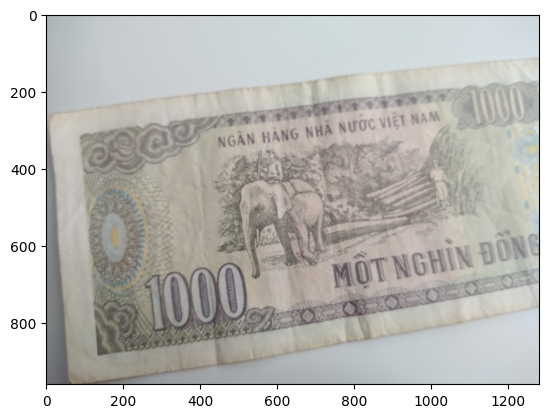

In [19]:
import matplotlib.pyplot as plt
from keras.utils import load_img, img_to_array
img = load_img('/content/drive/MyDrive/Data_Money/test_1000.jpg')
plt.imshow(img)
plt.show()

1/1 [==============================] - 0s 114ms/step
1.000 VND


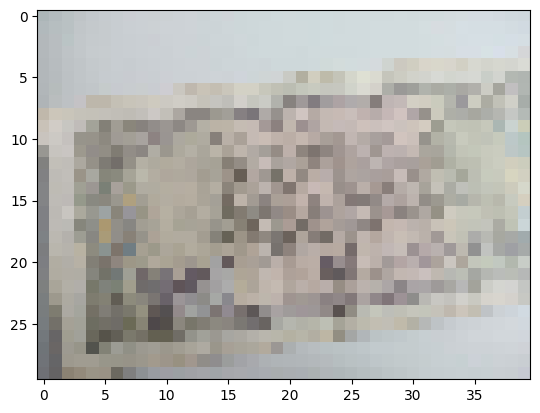

In [20]:
from matplotlib import pyplot as plt
img = load_img(r'/content/drive/MyDrive/Data_Money/test_1000.jpg', target_size=(30, 40))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 30, 40, 3)
img = img.astype('float32') / 255
result = labels[np.argmax(model.predict(img))]
print(result)

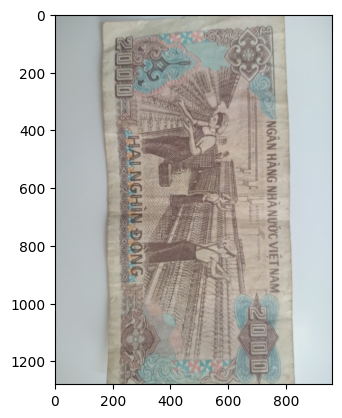

In [23]:
import matplotlib.pyplot as plt
from keras.utils import load_img, img_to_array
img = load_img('/content/drive/MyDrive/Data_Money/test_2000.jpg')
plt.imshow(img)
plt.show()

1/1 [==============================] - 0s 19ms/step
2.000 VND


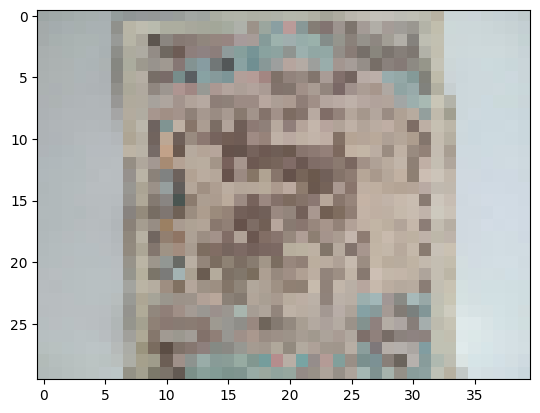

In [24]:
from matplotlib import pyplot as plt
img = load_img(r'/content/drive/MyDrive/Data_Money/test_2000.jpg', target_size=(30, 40))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 30, 40, 3)
img = img.astype('float32') / 255
result = labels[np.argmax(model.predict(img))]
print(result)

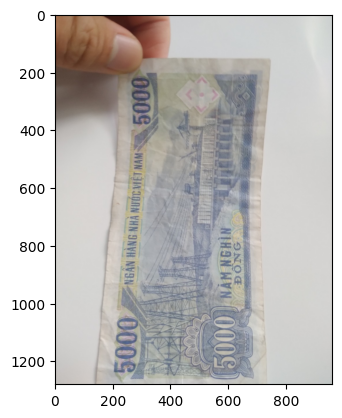

In [28]:
import matplotlib.pyplot as plt
from keras.utils import load_img, img_to_array
img = load_img('/content/drive/MyDrive/Data_Money/test_5000.jpg')
plt.imshow(img)
plt.show()

1/1 [==============================] - 0s 16ms/step
5.000 VND


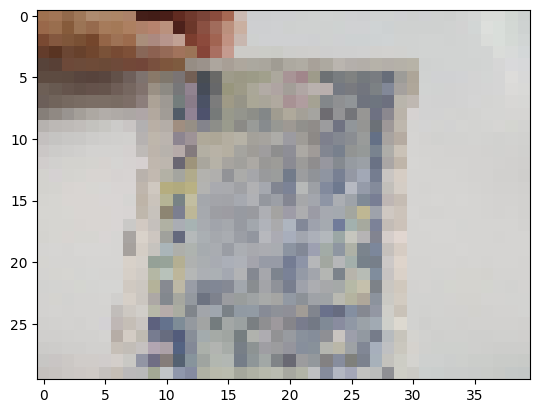

In [29]:
from matplotlib import pyplot as plt
img = load_img(r'/content/drive/MyDrive/Data_Money/test_5000.jpg', target_size=(30, 40))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 30, 40, 3)
img = img.astype('float32') / 255
result = labels[np.argmax(model.predict(img))]
print(result)

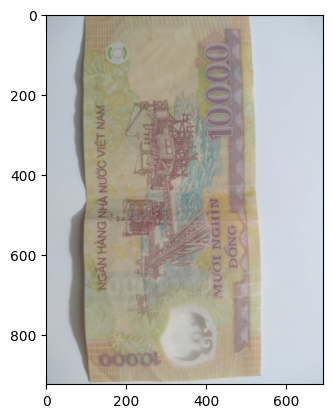

In [30]:
import matplotlib.pyplot as plt
from keras.utils import load_img, img_to_array
img = load_img('/content/drive/MyDrive/Data_Money/test_10k.jpg')
plt.imshow(img)
plt.show()

1/1 [==============================] - 0s 104ms/step
10.000 VND


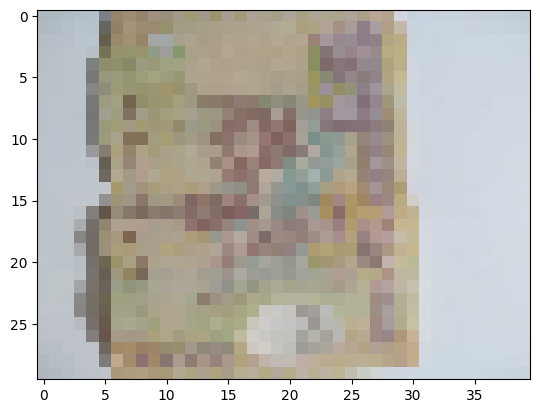

In [31]:
from matplotlib import pyplot as plt
img = load_img(r'/content/drive/MyDrive/Data_Money/test_10k.jpg', target_size=(30, 40))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 30, 40, 3)
img = img.astype('float32') / 255
result = labels[np.argmax(model.predict(img))]
print(result)

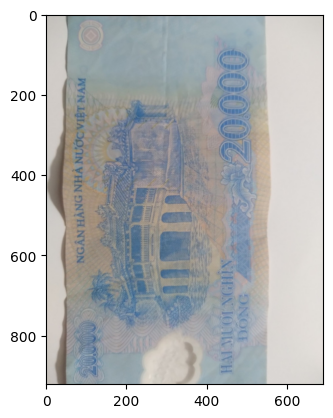

In [32]:
import matplotlib.pyplot as plt
from keras.utils import load_img, img_to_array
img = load_img('/content/drive/MyDrive/Data_Money/test_20k.jpg')
plt.imshow(img)
plt.show()

1/1 [==============================] - 0s 31ms/step
20.000 VND


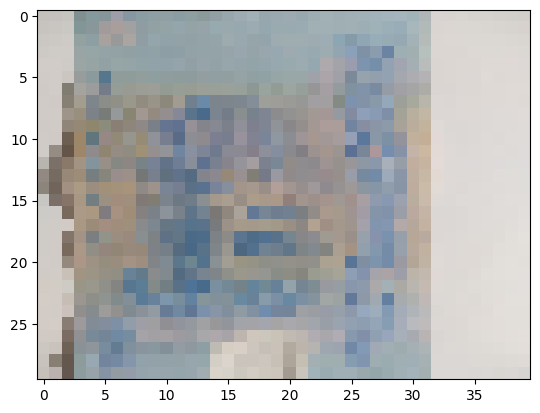

In [33]:
from matplotlib import pyplot as plt
img = load_img(r'/content/drive/MyDrive/Data_Money/test_20k.jpg', target_size=(30, 40))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 30, 40, 3)
img = img.astype('float32') / 255
result = labels[np.argmax(model.predict(img))]
print(result)

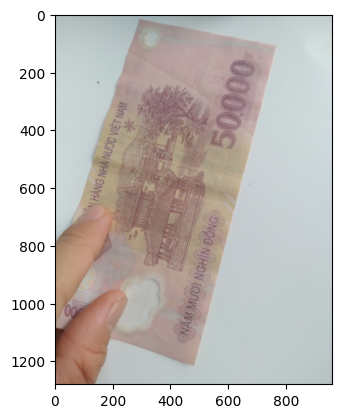

In [36]:
import matplotlib.pyplot as plt
from keras.utils import load_img, img_to_array
img = load_img('/content/drive/MyDrive/Data_Money/test_50k.jpg')
plt.imshow(img)
plt.show()

1/1 [==============================] - 0s 17ms/step
50.000 VND


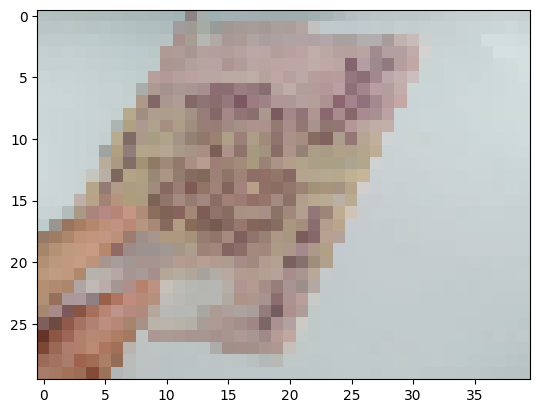

In [37]:
from matplotlib import pyplot as plt
img = load_img(r'/content/drive/MyDrive/Data_Money/test_50k.jpg', target_size=(30, 40))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 30, 40, 3)
img = img.astype('float32') / 255
result = labels[np.argmax(model.predict(img))]
print(result)

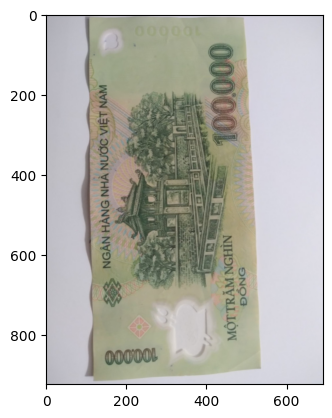

In [38]:
import matplotlib.pyplot as plt
from keras.utils import load_img, img_to_array
img = load_img('/content/drive/MyDrive/Data_Money/test_100K.jpg')
plt.imshow(img)
plt.show()

1/1 [==============================] - 0s 24ms/step
100.000 VND


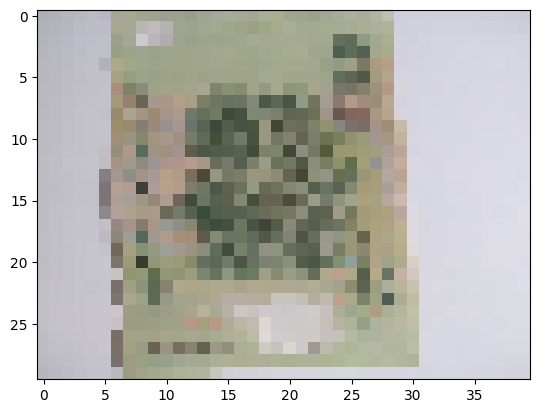

In [39]:
from matplotlib import pyplot as plt
img = load_img(r'/content/drive/MyDrive/Data_Money/test_100K.jpg', target_size=(30, 40))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 30, 40, 3)
img = img.astype('float32') / 255
result = labels[np.argmax(model.predict(img))]
print(result)

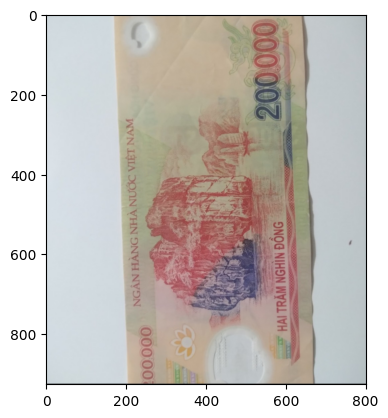

In [40]:
import matplotlib.pyplot as plt
from keras.utils import load_img, img_to_array
img = load_img('/content/drive/MyDrive/Data_Money/test_200k.jpg')
plt.imshow(img)
plt.show()

1/1 [==============================] - 0s 52ms/step
200.000 VND


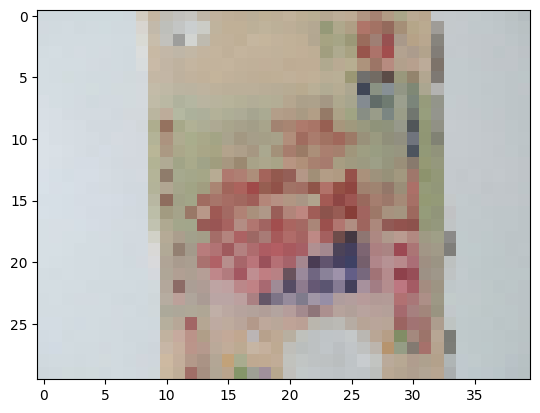

In [41]:
from matplotlib import pyplot as plt
img = load_img(r'/content/drive/MyDrive/Data_Money/test_200k.jpg', target_size=(30, 40))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 30, 40, 3)
img = img.astype('float32') / 255
result = labels[np.argmax(model.predict(img))]
print(result)

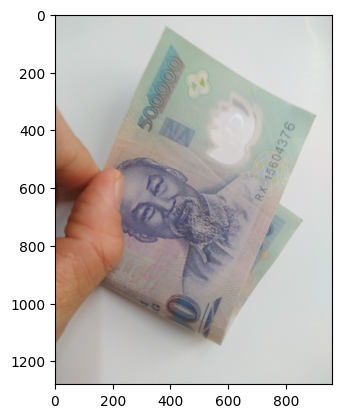

In [49]:
import matplotlib.pyplot as plt
from keras.utils import load_img, img_to_array
img = load_img('/content/drive/MyDrive/Data_Money/test_500k.jpg')
plt.imshow(img)
plt.show()

1/1 [==============================] - 0s 17ms/step
500.000 VND


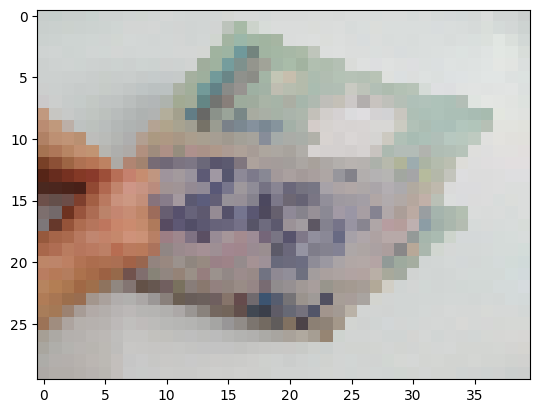

In [50]:
from matplotlib import pyplot as plt
img = load_img(r'/content/drive/MyDrive/Data_Money/test_500k.jpg', target_size=(30, 40))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 30, 40, 3)
img = img.astype('float32') / 255
result = labels[np.argmax(model.predict(img))]
print(result)